# Tutorial de Matplotlib

Tutorial de como criar gráficos usando `matplotlib.pyplot`. Segui [esse](https://www.youtube.com/watch?v=cTJBJH8hacc) tutorial.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from functools import partial

plt.style.use(['science', 'notebook', 'grid']) # Veja os primeiros 5 minutos do tutorial p/ reproduzir

***

## Gráficos Básicos + API Básica

### Linha

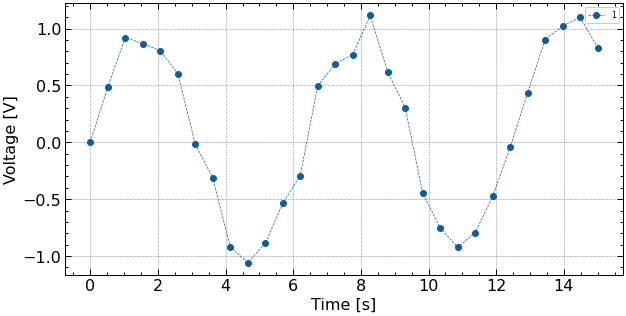

In [3]:
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.1 * np.random.randn(len(x))

plt.figure(figsize=(10, 5))

plt.plot(x, y, 'o--', lw=0.7, label='1')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(loc='upper right', fontsize=8)

### Múltiplas Linhas

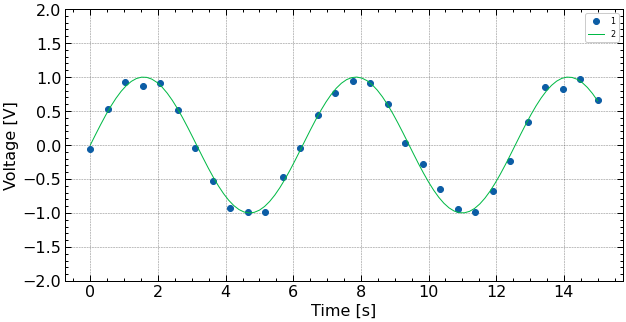

In [22]:
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.1 * np.random.randn(len(x))
x2 = np.linspace(0, 15, 100)
y2 = np.sin(x2)

plt.figure(figsize=(10, 5))

plt.plot(x, y, 'o', lw=0.7, label='1')
plt.plot(x2, y2, lw=1, label='2')

# Adicionando título, legendas e modificando aparência do gráfico
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.ylim((-2, 2))
plt.legend(loc='upper right', fontsize=8)

### Histogramas

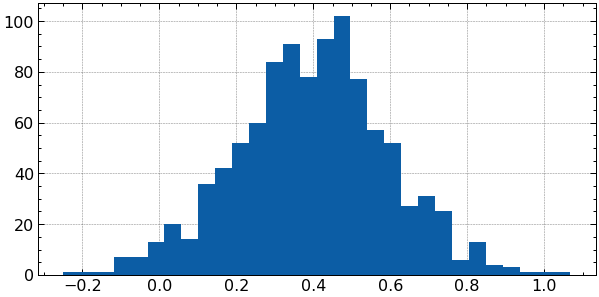

In [26]:
r = np.random.randn(1000) * 0.2 + 0.4

plt.figure(figsize=(10, 5))
plt.hist(r, bins=30)
plt.show()

### Gráfico de Densidade

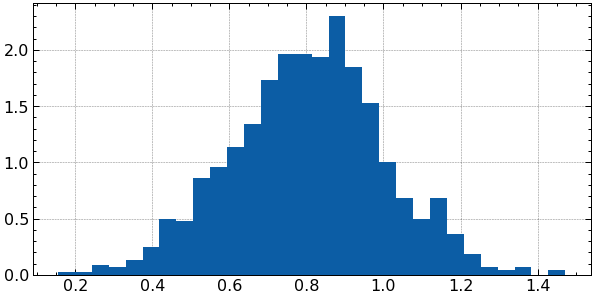

In [31]:
r = np.random.randn(1000) * 0.2 + 0.8

plt.figure(figsize=(10, 5))
plt.hist(r, bins=30, density=True)
plt.show()

### Histogramas sobrepostos

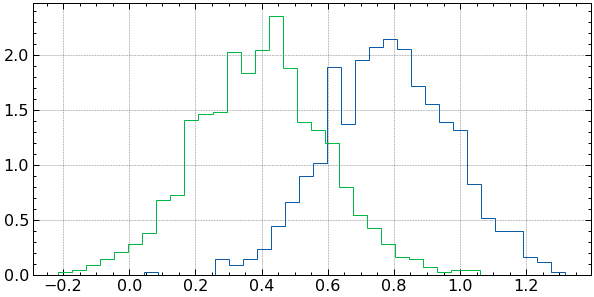

In [34]:
r = np.random.randn(1000) * 0.2 + 0.8
r2 = np.random.randn(1000) * 0.2 + 0.4

plt.figure(figsize=(10, 5))
plt.hist(r, bins=30, density=True, histtype='step')
plt.hist(r2, bins=30, density=True, histtype='step')
plt.show()

***

## Complicando os gráficos

### Múltiplos gráficos em uma figura

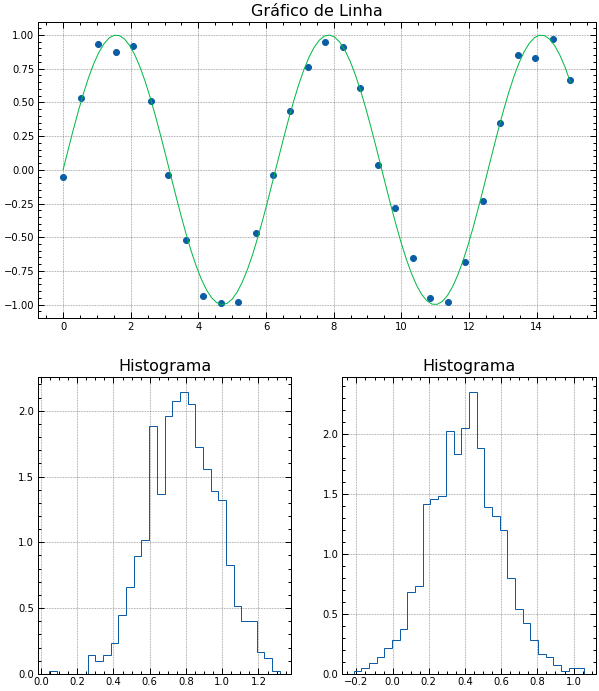

In [67]:
# Criando os gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 12))

axes[0, 0] = plt.subplot2grid(shape=(2, 2), loc=(0, 0), colspan=2)
axes[0, 0].plot(x, y, 'o', lw=0.7, label='1')
axes[0, 0].plot(x2, y2, lw=1, label='2')

axes[1, 0].hist(r, bins=30, density=True, histtype='step')
axes[1, 1].hist(r2, bins=30, density=True, histtype='step')

# Personalizando os gráficos
axes[0, 0].tick_params(axis='both', labelsize=10)
axes[1, 0].tick_params(axis='both', labelsize=10)
axes[1, 1].tick_params(axis='both', labelsize=10)

# Títulos
axes[0, 0].set_title('Gráfico de Linha')
axes[1, 0].set_title('Histograma')
axes[1, 1].set_title('Histograma')

plt.show()

### Exemplo

In [28]:
res_a1 = 0.2 * np.random.randn(1000) + 0.4
res_b1 = 0.25 * np.random.randn(1000) + 0.4
res_a2 = 0.21 * np.random.randn(1000) + 0.3
res_b2 = 0.22 * np.random.randn(1000) + 0.3

legend1 = '\n'.join((fr'$\sigma_a ={np.std(res_a1):.4f}$', fr'$\sigma_b={np.std(res_b1):.4f}$'))
legend2 = '\n'.join((fr'$\sigma_a ={np.std(res_a2):.4f}$', fr'$\sigma_b={np.std(res_b2):.4f}$'))

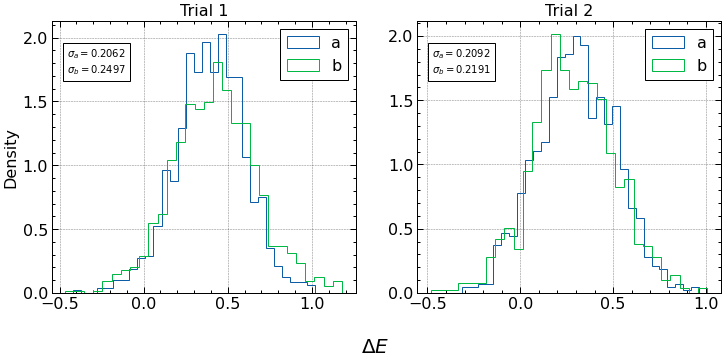

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(res_a1, bins=30, density=True, label='a', histtype='step')
axes[0].hist(res_b1, bins=30, density=True, label='b', histtype='step')
axes[0].legend(loc='upper right', fancybox=False, edgecolor='black')
axes[0].text(0.05, 0.81, legend1, transform=axes[0].transAxes, bbox=dict(facecolor='white', edgecolor='black'))

axes[1].hist(res_a2, bins=30, density=True, label='a', histtype='step')
axes[1].hist(res_b2, bins=30, density=True, label='b', histtype='step')
axes[1].legend(loc='upper right', fancybox=False, edgecolor='black')
axes[1].text(0.05, 0.81, legend2, transform=axes[1].transAxes, bbox=dict(facecolor='white', edgecolor='black'))

axes[0].set_ylabel('Density')
axes[0].set_title('Trial 1')
axes[1].set_title('Trial 2')
fig.text(0.5, -0.04, '$\Delta E$', ha='center', fontsize=20)

plt.show()

***

## 3D Plots

### Curvas de Nível

- [Curvas de nível simples](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html?highlight=pyplot%20cont#matplotlib.pyplot.contour)
- [Curvas de nível preenchidas](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html?highlight=pyplot%20cont#matplotlib.pyplot.contourf)
- [Cores matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

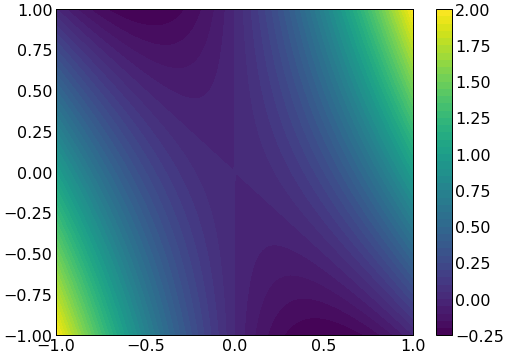

In [91]:
# Dados
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_, _)
z = x ** 2 + x * y

plt.contourf(x, y, z, levels=50)
plt.colorbar()
plt.show()

### Curva de Indiferença

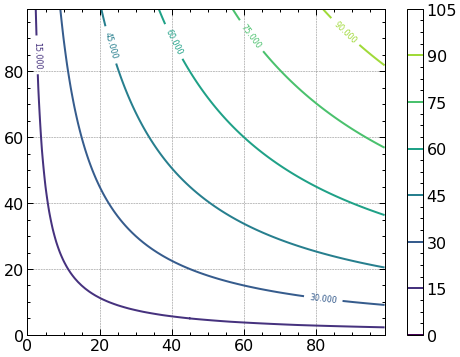

In [95]:
_ = np.arange(1, 100, 1)
x, y = np.meshgrid(_, _) 
u = (x ** 0.5) * (y ** 0.5) # Utilidade Cobb-Douglas

curve = plt.contour(x, y, u)
plt.colorbar()
plt.ylim(0)
plt.xlim(0)
plt.clabel(curve, fontsize=8)
plt.show()

### Gráfico de Superfície da Utilidade Cobb-Douglas

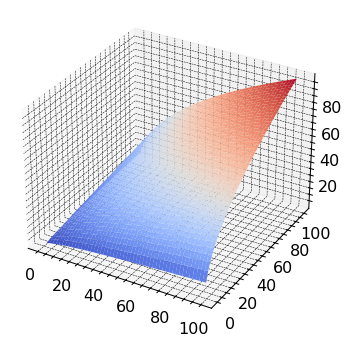

In [99]:
fig, axes = plt.subplots(subplot_kw={'projection': '3d'})
axes.plot_surface(x, y, u, cmap='coolwarm')
plt.show()

### StreamPlots

Para plotar campos vetoriais.

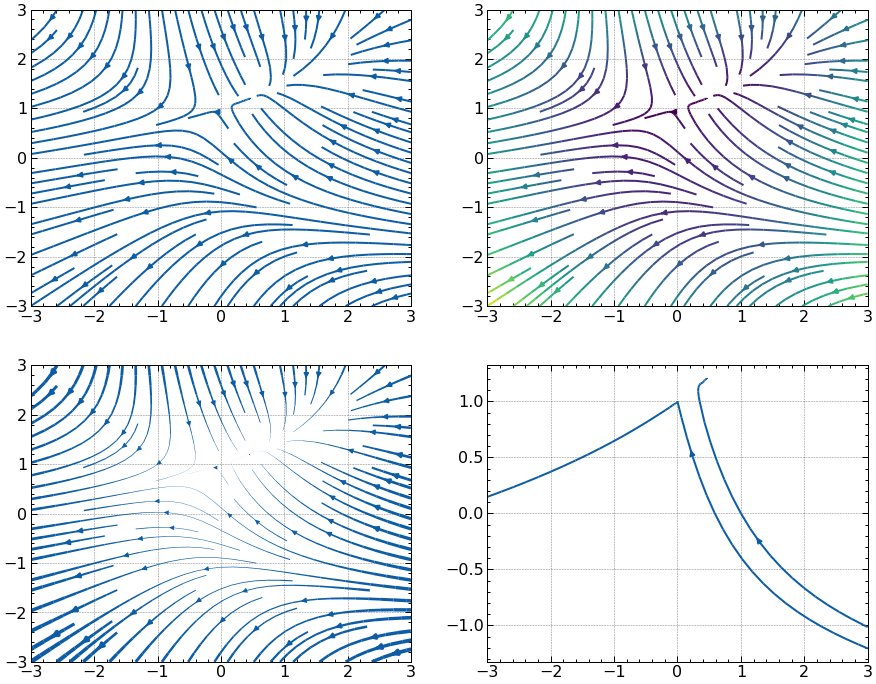

In [12]:
w = 3
_ = np.linspace(-3, 3, 100)
x, y = np.meshgrid(_, _)
u = y - (x ** 2) - 1
v = 1 + x - (y ** 2)
speed = np.sqrt((u ** 2) + (v ** 2))

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].streamplot(x, y, u, v)
axes[0, 1].streamplot(x, y, u, v, color=speed)
axes[1, 0].streamplot(x, y, u, v, linewidth=((5 * speed) / (speed.max())))

seedpoints = np.array([[0, 1], [1, 0]])
axes[1, 1].streamplot(x, y, u, v, start_points=seedpoints)


plt.show()

***

## Extras

### Imagens

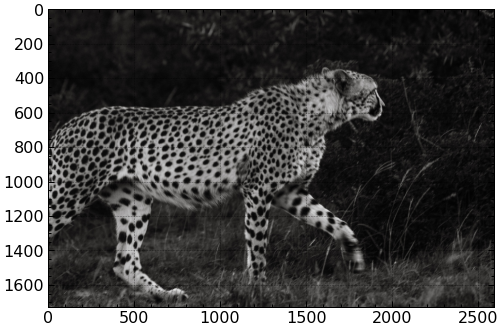

In [14]:
img = plt.imread('assets/pexels-rachel-claire.jpg')
plt.imshow(img)

plt.show()